# Predictive Hosuing Model Using Various Linear Regression Algorithms

### Introduction

TODO

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.calibration import LabelEncoder

current_dir = os.getcwd()
dataset_name = "Housing.csv"
dataset_path = os.path.join(current_dir, dataset_name)

df = pd.read_csv(dataset_path)
categorical_features = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

label_encoder = LabelEncoder()

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

X = df.drop(columns=["price"]) 
y = df["price"]

print(X.shape)
print(X.shape)

(545, 13)
(545, 13)


In [63]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression() 
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred)
rmse_lin = mean_squared_error(y_test, y_pred, squared=False)
mae_lin = mean_absolute_error(y_test, y_pred)

print("Linear Regression Mean Absolute Error:", mse_lin)
print("Linear Regression Mean Squared Error:", mse_lin)
print("Linear Regression Root Mean Squared Error:", rmse_lin) 

Linear Regression Mean Absolute Error: 1754318687330.6677
Linear Regression Mean Squared Error: 1754318687330.6677
Linear Regression Root Mean Squared Error: 1324506.96009144


C:\Users\CFTOr\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [64]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {
    "alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

ridge_reg = Ridge() 

grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

ridge_reg = Ridge(alpha=grid_search.best_params_["alpha"]) 
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred)
rmse_ridge = mean_squared_error(y_test, y_pred, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred)

print("Ridge Regression Mean Absolute Error:", mae_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)
print("Ridge Regression Root Mean Squared Error:", rmse_ridge) 

Ridge Regression Mean Absolute Error: 967942.6216085082
Ridge Regression Mean Squared Error: 1759455843663.388
Ridge Regression Root Mean Squared Error: 1326444.8136516605


C:\Users\CFTOr\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [65]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [25, 50, 100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv = 5, scoring="neg_mean_squared_error", verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_rf_reg = RandomForestRegressor(**best_params, random_state=2)
best_rf_reg.fit(X_train, y_train)

y_pred = best_rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred)

print("Random Forest Mean Absolute Error:", mae_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest Root Mean Squared Error:", rmse_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Random Forest Mean Absolute Error: 1053944.0937405522
Random Forest Mean Squared Error: 2087661527691.1855
Random Forest Root Mean Squared Error: 1444874.2255612374


C:\Users\CFTOr\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [66]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)


param_grid = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
}

knn_reg = KNeighborsRegressor()

grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

knn_reg = KNeighborsRegressor(n_neighbors=grid_search.best_params_["n_neighbors"]) 
knn_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)

mse_knn = mean_squared_error(y_test, y_pred)
rmse_knn = mean_squared_error(y_test, y_pred, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred)

print("K-NN Mean Absolute Error:", mae_knn)
print("K-NN Mean Squared Error:", mse_knn)
print("K-NN Forest Root Mean Squared Error:", rmse_knn)

C:\Users\CFTOr\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


K-NN Mean Absolute Error: 967942.6216085082
K-NN Mean Squared Error: 1759455843663.388
K-NN Forest Root Mean Squared Error: 1326444.8136516605


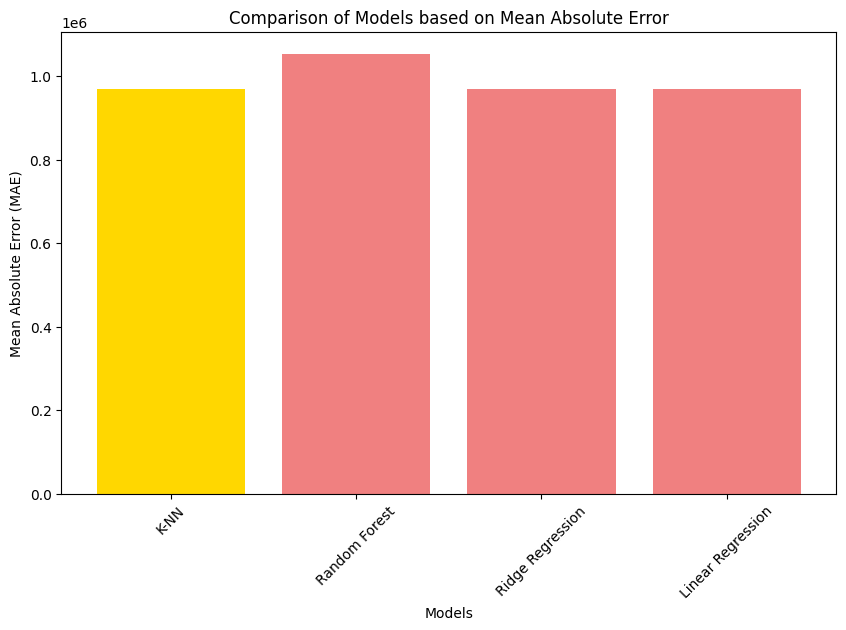

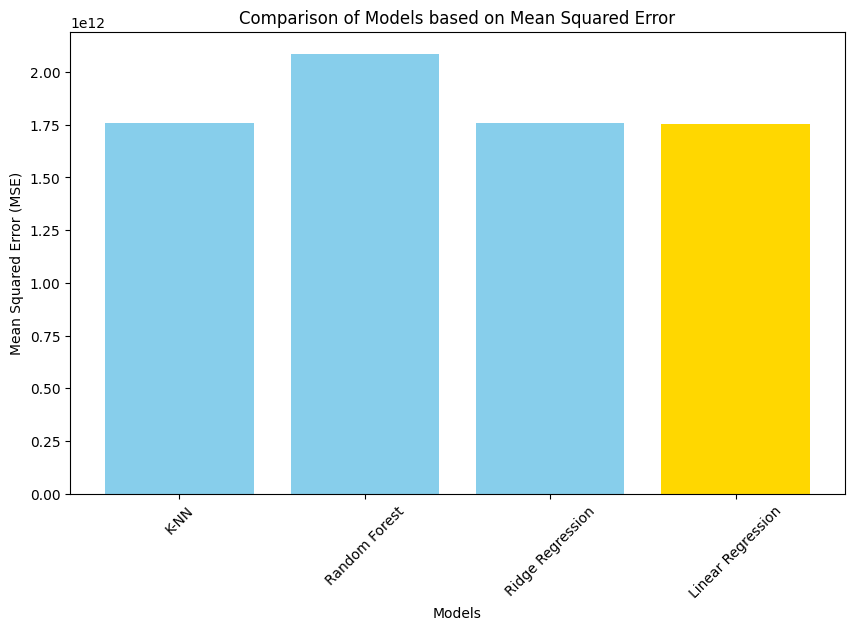

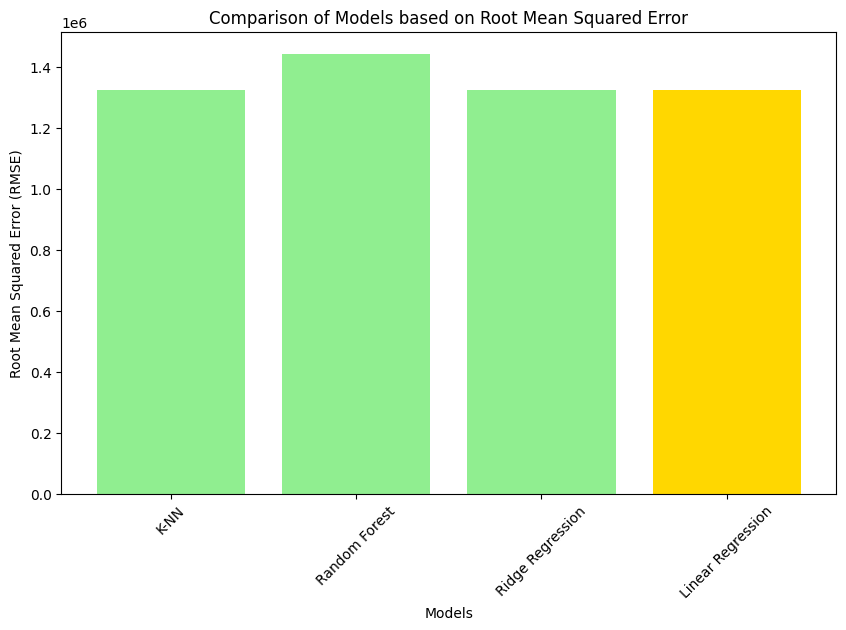

In [71]:
models = ["K-NN", "Random Forest", "Ridge Regression", "Linear Regression"]
mae_values = [mae_knn, mae_rf, mae_ridge, mae_lin]
mse_values = [mse_knn, mse_rf, mse_ridge, mse_lin]  
rmse_values = [rmse_knn, rmse_rf, rmse_ridge, rmse_lin]

best_model_index_mae = mae_values.index(min(mae_values))
best_model_index_mse = mse_values.index(min(mse_values))
best_model_index_rmse = rmse_values.index(min(rmse_values))

highlight_color = "gold"
colors_mae = ["lightcoral" if i != best_model_index_mae else highlight_color for i in range(len(models))]
colors_mse = ["skyblue" if i != best_model_index_mse else highlight_color for i in range(len(models))]
colors_rmse = ["lightgreen" if i != best_model_index_rmse else highlight_color for i in range(len(models))]

# Plot the bar graph for MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=colors_mae)
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Comparison of Models based on Mean Absolute Error")
plt.xticks(rotation=45)
plt.show()

# Plot the bar graph for MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=colors_mse)
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Models based on Mean Squared Error")
plt.xticks(rotation=45)
plt.show()

# Plot the bar graph for RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=colors_rmse)
plt.xlabel("Models")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Comparison of Models based on Root Mean Squared Error")
plt.xticks(rotation=45)
plt.show()
